In [13]:
%matplotlib inline
import pandas as pd
import json
from pprint import pprint
from random import sample
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
import numpy as np
import plotly.plotly as py
import requests
from pymongo import MongoClient
import matplotlib as plt
from sklearn.linear_model import LogisticRegression

In [15]:
def load_json_to_df(datapass):
    '''
    Load the json file and parse the file to pandas dataframe format
    
    Input:
        datapass(str) : directory to the json file
    Output:
        df(dataframe) : pandas dataframe object
    '''
    
    data = [] 
    with open(datapass) as data_file: 
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    return df

In [16]:
DATAPASS1 = 'business.json'
business = load_json_to_df(DATAPASS1)
business.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{u'RestaurantsPriceRange2': 2, u'BusinessParki...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{u'Monday': u'10:00-22:00', u'Tuesday': u'10:0...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{u'BusinessParking': {u'garage': False, u'stre...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{u'Monday': u'10:00-19:00', u'Tuesday': u'10:0...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{u'Tuesday': u'9:00-17:00', u'Friday': u'9:00-...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{u'GoodForMeal': {u'dessert': False, u'latenig...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [18]:
feature = ['review_count','stars']

In [22]:
X = business.loc[:, feature]

In [23]:
y = business.is_open
y[1:5,]
type(y[1])

numpy.int64

In [24]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
logreg.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:

DATAPASS2 = 'user.json'
user = load_json_to_df(DATAPASS2)

In [49]:

DATAPASS4 = 'checkin.json'
checkin = load_json_to_df(DATAPASS4)

In [50]:
DATAPASS3 = 'tip.json'
tip = load_json_to_df(DATAPASS3)

In [51]:
print ('{} business'.format(business.shape[0]))
print ('{} users'.format(user.shape[0]))
print ('{} checkin'.format(checkin.shape[0]))
print ('{} tips'.format(tip.shape[0]))

156639 business
1183362 users
135148 checkin
1028802 tips


In [52]:
print format(tip.shape[0])

1028802


In [53]:
print tip.shape[0]

1028802


In [54]:
# id deplicates
print ('{} user_id' .format(tip.shape[0]))
print ('{} business id'.format(len(set(business['business_id']))))

1028802 user_id
156639 business id


In [55]:
print business.columns

Index([u'address', u'attributes', u'business_id', u'categories', u'city',
       u'hours', u'is_open', u'latitude', u'longitude', u'name',
       u'neighborhood', u'postal_code', u'review_count', u'stars', u'state'],
      dtype='object')


In [56]:
business.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{u'RestaurantsPriceRange2': 2, u'BusinessParki...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{u'Monday': u'10:00-22:00', u'Tuesday': u'10:0...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{u'BusinessParking': {u'garage': False, u'stre...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{u'Monday': u'10:00-19:00', u'Tuesday': u'10:0...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{u'Tuesday': u'9:00-17:00', u'Friday': u'9:00-...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{u'GoodForMeal': {u'dessert': False, u'latenig...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [57]:

print ('{} unique state'.format(len(set(business['state']))))
print ('{} unique cities'.format(len(set(business['city']))))
print ('{} unique neighborhood\n'.format(len(set(business['neighborhood']))))

print ('{} open business'.format(business['is_open'].sum()))
print ('{} close business'.format(business.shape[0] - business['is_open'].sum()))

51 unique state
1010 unique cities
383 unique neighborhood

132262 open business
24377 close business


In [58]:
print business.shape[0]
business['neighborhood'].isnull().value_counts()

156639


False    156639
Name: neighborhood, dtype: int64

In [59]:
#review_count city mean
grouped_review_state = business.groupby('city')['review_count']
meanRC = grouped_review_state.mean()[:10]
meanRC.sort_values(ascending = False)


city
Ahwatukee                      48.312500
110 Las Vegas                  47.000000
Ahwahtukee                     15.000000
Ajax                           10.533981
Ahwatukee Foothills Village     7.000000
AGINCOURT                       6.000000
                                5.333333
Aberdour                        4.000000
Aberlady                        3.500000
Aichwald                        3.000000
Name: review_count, dtype: float64

In [60]:
las = business.loc[business['city'] == '110 Las Vegas']
# not end

In [61]:
# choose columns
busi_sub = pd.DataFrame(business, columns = ['business_id', 'name', 'categories', 
                                          'review_count','stars'])

In [62]:
busi_sub.head(8)

,business_id,name,categories,review_count,stars
0,YDf95gJZaq05wvo7hTQbbQ,Richmond Town Square,"[Shopping, Shopping Centers]",17,2.0
1,mLwM-h2YhXl2NCgdS84_Bw,South Florida Style Chicken & Ribs,"[Food, Soul Food, Convenience Stores, Restaura...",4,4.5
2,v2WhjAB3PIBA8J8VxG3wEg,The Tea Emporium,"[Food, Coffee & Tea]",7,4.5
3,CVtCbSB1zUcUWg-9TNGTuQ,TRUmatch,"[Professional Services, Matchmakers]",3,3.0
4,duHFBe87uNSXImQmvBh87Q,Blimpie,"[Sandwiches, Restaurants]",10,4.5
5,uUEMrhJiL1a1pCA_I1SU7Q,Baxter's Cigars,"[Shopping, Tobacco Shops]",35,5.0
6,2eJEUJIP54tex7T9YOcLSw,Back-Health Chiropractic,"[Chiropractors, Health & Medical]",19,5.0
7,fEylCY3UEH8YJ0Xa7lu6lA,Auto Bathouse,"[Automotive, Oil Change Stations, Car Wash, Au...",16,2.5


In [63]:
# corr between review_count and stars
busi_sub.corr()
# ???? why is corr small?

,review_count,stars
review_count,1.000000,0.025616
stars,0.025616,1.000000


In [64]:
busi_top = busi_sub.loc[busi_sub.stars == 5.0]

In [65]:
busi_top.sort_values(by='review_count', ascending=False)
busi_top[:10]
# ???????

,business_id,name,categories,review_count,stars
5,uUEMrhJiL1a1pCA_I1SU7Q,Baxter's Cigars,"[Shopping, Tobacco Shops]",35,5.0
6,2eJEUJIP54tex7T9YOcLSw,Back-Health Chiropractic,"[Chiropractors, Health & Medical]",19,5.0
8,kFtuYklkAIlmYw8RZAieGw,JAB Jewelry Designs,"[Jewelry Repair, Gold Buyers, Local Services, ...",7,5.0
9,NqiQdFa93wzUJGo29NbTPQ,Neighborhood Vision Center,"[Health & Medical, Optometrists]",8,5.0
23,igcy3ojJbgbpS8K70gvFQg,Direct Mindpower,"[Life Coach, Health & Medical, Professional Se...",33,5.0
24,5Ghe0btvM7tXqANnhNB5eg,Premiere Social Media,"[Advertising, Marketing, Professional Services...",8,5.0
40,aj1C0D7hniEPpsTidbCQIg,Express Collision Center,"[Auto Insurance, Body Shops, Auto Repair, Insu...",54,5.0
68,g-HSA1m2vFPjKHYnqiL6qA,The Tattoo Lounge,"[Piercing, Beauty & Spas, Tattoo]",6,5.0
75,fIWozPW-2wRknzsDqdgyjg,Box Brothers,"[Local Services, Shipping Centers]",12,5.0
76,UlDvngOADDhshzMKvrMsQw,Sun Devil Window Cleaning,"[Glass & Mirrors, Window Washing, Home Services]",7,5.0


In [66]:
# user analysis
user = pd.DataFrame(user)

In [67]:
user.head(5)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,...,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,9,0,9,1,0,1,4,1,11,...,4,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,276,0,276,59,0,8,51,169,386,...,6006,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16


In [71]:
#print variables with high corelation
userCo = user.corr()
userCo[userCo > 0.5]

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
average_stars,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compliment_cool,NaN,1.000000,0.631019,1.000000,0.920524,0.522636,0.702907,0.591393,0.706654,0.893249,0.690938,0.923838,0.664988,0.549342,0.687138,NaN,0.656526
compliment_cute,NaN,0.631019,1.000000,0.631019,0.637188,0.944832,0.931110,NaN,0.848138,0.536503,0.892202,0.689738,NaN,NaN,NaN,NaN,NaN
compliment_funny,NaN,1.000000,0.631019,1.000000,0.920524,0.522636,0.702907,0.591393,0.706654,0.893249,0.690938,0.923838,0.664988,0.549342,0.687138,NaN,0.656526
compliment_hot,NaN,0.920524,0.637188,0.920524,1.000000,NaN,0.657061,0.692549,0.670820,0.764216,0.649811,0.847472,0.560602,0.508048,0.585059,NaN,0.551269
compliment_list,NaN,0.522636,0.944832,0.522636,NaN,1.000000,0.948791,NaN,0.840489,NaN,0.913183,0.633912,NaN,NaN,NaN,NaN,NaN
compliment_more,NaN,0.702907,0.931110,0.702907,0.657061,0.948791,1.000000,NaN,0.879671,0.619880,0.964658,0.803448,NaN,NaN,NaN,NaN,NaN
compliment_note,NaN,0.591393,NaN,0.591393,0.692549,NaN,NaN,1.000000,NaN,0.547192,NaN,0.565038,NaN,NaN,NaN,NaN,NaN
compliment_photos,NaN,0.706654,0.848138,0.706654,0.670820,0.840489,0.879671,NaN,1.000000,0.614918,0.851391,0.784013,NaN,NaN,NaN,NaN,NaN
compliment_plain,NaN,0.893249,0.536503,0.893249,0.764216,NaN,0.619880,0.547192,0.614918,1.000000,0.609907,0.838451,0.678225,0.578525,0.678436,NaN,0.690632


In [ ]:
busi_state = business.groupby('state').sum().sort_values(by = 'review_count', 
                                            ascending = False)['review_count'][:10]
busi_state.plot(ax=ax, style='k-')

In [62]:
# if the same name means the same business_id
print ('{} business id'.format(len(set(business['business_id']))))
print ('{} name'.format(len(set(business['name']))))

156639 business id
118580 name


In [63]:
# relationship between city and restaurant name
grouped_review_cityNama = business.groupby([business['name'], business['city']])['review_count']
meanR_C_N = grouped_review_cityNama.mean()[:10]
meanR_C_N.sort_values(ascending = False)


name                                 city       
# 1 Nails                            Las Vegas      48.0
#1 Cochran Hyundai - Monroeville     Monroeville    21.0
#1 Cochran Hyundai of South Hills    Pittsburgh     11.0
#1 Cochran Mazda - North Hills       Wexford         9.0
#1 Cochran Buick GMC of Robinson     Pittsburgh      9.0
#1 Cochran Cadillac - Monroeville    Monroeville     8.0
                                     Monreoville     8.0
"T"s Hair Affair                     Chandler        6.0
#1 Cochran Buick GMC of Monroeville  Monroeville     5.0
#1 Cochran Mazda - Monroeville       Monroeville     3.0
Name: review_count, dtype: float64

In [64]:
# relationship between city and restaurant name
grouped_review_cityNama = business.groupby([business['name'], business['city']])['stars']
meanR_C_N = grouped_review_cityNama.mean()[:10]
meanR_C_N.sort_values(ascending = False)

name                                 city       
"T"s Hair Affair                     Chandler       5.0
#1 Cochran Cadillac - Monroeville    Monreoville    4.5
#1 Cochran Mazda - North Hills       Wexford        4.0
# 1 Nails                            Las Vegas      4.0
#1 Cochran Mazda - Monroeville       Monroeville    3.5
#1 Cochran Hyundai of South Hills    Pittsburgh     3.5
#1 Cochran Hyundai - Monroeville     Monroeville    3.5
#1 Cochran Cadillac - Monroeville    Monroeville    3.5
#1 Cochran Buick GMC of Robinson     Pittsburgh     1.5
#1 Cochran Buick GMC of Monroeville  Monroeville    1.0
Name: stars, dtype: float64

In [ ]:

def listToString(data):
    for i in range(data.shape[0]):
        data[i] = ''.join(data[i])
    return data
business_c = listToString(business['categories'])
business_c[1:10]

In [72]:
# # binning
# bins = pd.qcut(business['review_count'], 4)
# #business['review_count']


In [73]:
# data = [ dict(
#         type='choropleth',
#         autocolorscale = False,
#         locations = business.groupby('state').sum().sort_values(by = 'review_count', ascending = False)['review_count'].keys(),
#         z = np.log(business.groupby('state').sum().sort_values(by = 'review_count', ascending = False)['review_count'].values),
#         locationmode = 'USA-states',
#         marker = dict(
#             line = dict (
#                 color = 'rgb(255,255,255)',
#                 width = 2
#             ) ),
#         ) ]

# layout = dict(
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showlakes = True,
#             lakecolor = 'rgb(255, 255, 255)'),
#              )
    
# fig = dict( data=data, layout=layout )
# py.iplot(fig)

In [75]:
# import plotly.graph_objs as go
# data = [go.Scatter(x=user.groupby('joined_year').count()['user_id'].keys(), y=user.groupby('joined_year').count()['user_id'].values)]
# layout = go.Layout( title='New Yelp User',
#     xaxis={'title':'Year'},
#     yaxis={'title':'Number of new users'},
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

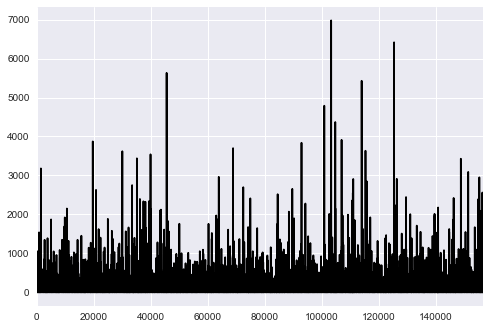

In [25]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
review = business['review_count']
review.plot(ax=ax, style='k-')


,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


In [37]:
import plotly.plotly as py
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )
